## Logistic Regression Model for Wine Classification

### Imports

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
train_df = pd.read_csv('../data/processed/wine_train.csv')
test_df = pd.read_csv('../data/processed/wine_test.csv')

X_train = train_df.drop(columns=['class'])
y_train = train_df['class']

X_test = test_df.drop(columns=['class'])
y_test = test_df['class']

### Create baseline model

In [43]:
dummy = DummyClassifier(random_state=123)
mean_cv_score = cross_val_score(dummy, X_train, y_train).mean()
print(f"Baseline model achieves {round(mean_cv_score*100,2)}% accuracy")

Baseline model achieves 40.33% accuracy


### Optimize C hyperparameter for logistic regression model

In [46]:
pipe_lr = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=2000)
)

param_grid = {
    "logisticregression__C": np.array([0.01,0.1,1,10,100,1000])
}

C_search = GridSearchCV(
    pipe_lr, param_grid, n_jobs=-1, cv=5, return_train_score=True
)
C_search.fit(X_train, y_train)

print("Optimal C value: ", C_search.best_params_)

Optimal C value:  {'logisticregression__C': 0.1}


Text(0, 0.5, 'Accuracy')

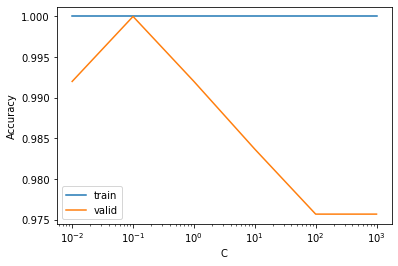

In [45]:
train_scores = C_search.cv_results_["mean_train_score"]
cv_scores = C_search.cv_results_["mean_test_score"]

plt.semilogx(param_grid["logisticregression__C"], train_scores, label="train")
plt.semilogx(param_grid["logisticregression__C"], cv_scores, label="valid")
plt.legend()

plt.xlabel("C")
plt.ylabel("Accuracy")

### Create logistic regression model with optimal hyperparameter

In [48]:
pipe_lr = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=2000, C=0.1)
)

pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=2000))])

In [50]:
train_score = pipe_lr.score(X_train,y_train)
test_score = pipe_lr.score(X_test,y_test)

print(f"Final LR model training accuracy: {train_score*100}%")
print(f"Final LR model test accuracy: {test_score*100}%")

Final LR model training accuracy: 100.0%
Final LR model test accuracy: 100.0%
